In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("2015_trip_data.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [3]:
day_of_week = pd.DatetimeIndex(df['starttime']).dayofweek

In [4]:
df['day_of_week'] = day_of_week

In [5]:
pd.value_counts(day_of_week, sort=False)

0    21266
1    20465
2    20748
3    21505
4    21097
5    20358
6    17407
dtype: int64

Create a dataframe with station counts averages by day-of-week.

In [6]:
from_group_by_weekday = df.groupby(['from_station_id','day_of_week'])['trip_id'].count()

In [7]:
from_group_by_weekday_unstack =from_group_by_weekday.unstack()

In [8]:
from_group_by_weekday_unstack.shape

(55, 7)

In [9]:
from_group_by_weekday_unstack = from_group_by_weekday_unstack[from_group_by_weekday_unstack.index != 'Pronto shop']

In [10]:
from_group_by_weekday_unstack.shape

(54, 7)

In [11]:
from_counts_avg = from_group_by_weekday_unstack/52
from_counts_avg.head() 

day_of_week,0,1,2,3,4,5,6
from_station_id,,,,,,,
BT-01,15.500000,13.923077,13.057692,15.403846,17.711538,22.076923,15.500000
BT-03,11.096154,11.423077,11.923077,11.653846,12.634615,11.480769,10.538462
BT-04,7.442308,6.750000,6.576923,7.115385,6.596154,4.269231,3.961538
BT-05,9.615385,9.442308,8.884615,9.538462,9.923077,9.711538,7.653846
CBD-03,8.980769,8.711538,8.519231,9.153846,8.942308,5.942308,6.942308


In [12]:
to_group_by_weekday = df.groupby(['to_station_id', 'day_of_week'])['trip_id'].count()

In [13]:
to_group_by_weekday_unstack =to_group_by_weekday.unstack()

In [14]:
to_group_by_weekday_unstack.shape

(55, 7)

In [15]:
to_group_by_weekday_unstack = to_group_by_weekday_unstack[to_group_by_weekday_unstack.index != 'Pronto shop']

In [16]:
to_group_by_weekday_unstack.shape

(54, 7)

In [17]:
to_counts_avg = to_group_by_weekday_unstack/52
to_counts_avg.head()

day_of_week,0,1,2,3,4,5,6
to_station_id,,,,,,,
BT-01,15.153846,12.923077,13.403846,15.230769,16.346154,22.076923,16.403846
BT-03,10.250000,9.903846,10.057692,8.634615,9.038462,8.269231,8.961538
BT-04,6.307692,5.615385,5.750000,5.500000,5.384615,3.903846,3.230769
BT-05,9.826923,9.576923,9.384615,10.596154,9.653846,9.730769,7.750000
CBD-03,11.903846,11.500000,11.942308,11.653846,12.288462,8.576923,8.269231


In [18]:
diff_counts_avg = from_counts_avg-to_counts_avg 
diff_counts_avg.head()

day_of_week,0,1,2,3,4,5,6
from_station_id,,,,,,,
BT-01,0.346154,1.000000,-0.346154,0.173077,1.365385,0.000000,-0.903846
BT-03,0.846154,1.519231,1.865385,3.019231,3.596154,3.211538,1.576923
BT-04,1.134615,1.134615,0.826923,1.615385,1.211538,0.365385,0.730769
BT-05,-0.211538,-0.134615,-0.500000,-1.057692,0.269231,-0.019231,-0.096154
CBD-03,-2.923077,-2.788462,-3.423077,-2.500000,-3.346154,-2.634615,-1.326923


Structure the 7 day-of-week plots as subplots

In [19]:
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param str column: column number to plot
    :param dict opts: dict key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    if 'xlabel'in opts:
      plt.xlabel(opts['xlabel'])
    if 'ylabel'in opts:
      plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and 'xticks'in opts:
      plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
      _, labels = plt.xticks()  # Get the new labels of the plot
      plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
      labels = ['' for x in df.index]
      plt.xticks(index, labels)   
    if 'ylim' in opts:
      plt.ylim(opts['ylim'])
    if 'title' in opts:
      plt.title(opts['title'])

Let's plot Monday first. 

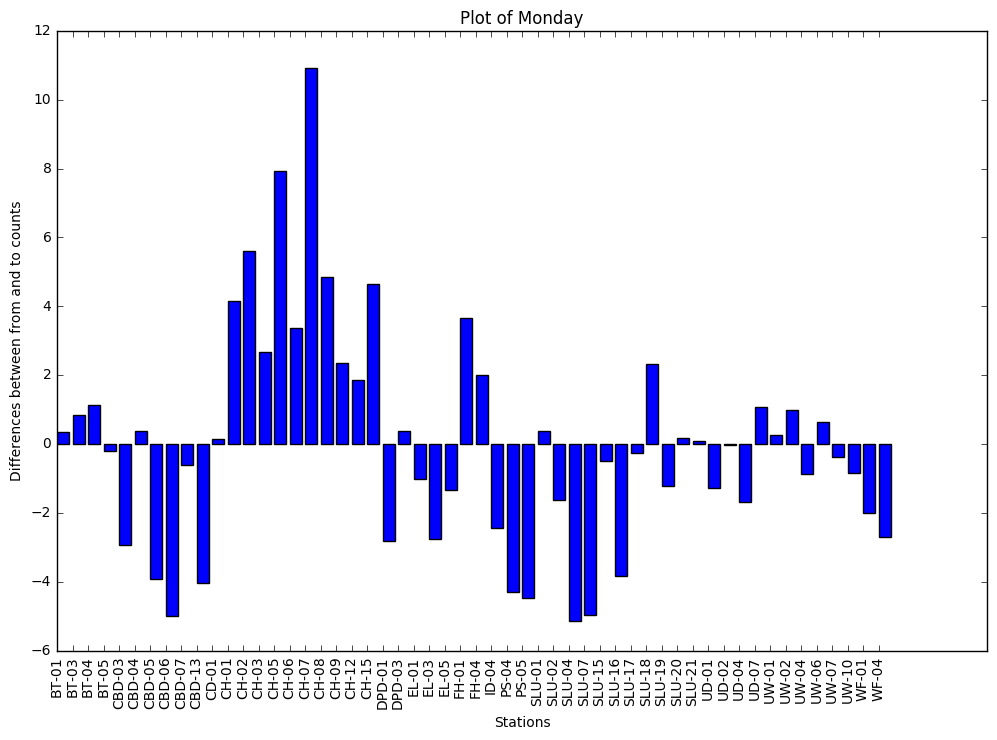

In [20]:
# plot Monday
fig = plt.figure(figsize=(12, 8))  # Controls global properties of the bar plot
opts = {'xlabel': 'Stations', 'ylabel': 'Differences between from and to counts', 'xticks': True
       ,'title':'Plot of Monday'}
plot_bar1(diff_counts_avg, 0, opts)

Plot 7 day-of-week together

In [21]:
def plot_barN(df,opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param list-of-str columns: names of the column to plot
    :param dict opts: plot attribute as key, value pair 
    """
    num_columns = 7
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for column in range(0,7):
        idx += 1
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        if idx == num_columns:
          local_opts['xticks'] = True
          local_opts['xlabel'] = opts['xlabel']
        plt.subplot(num_columns, 1, idx) # 1 column in the plot
        plot_bar1(df, column, local_opts)
    

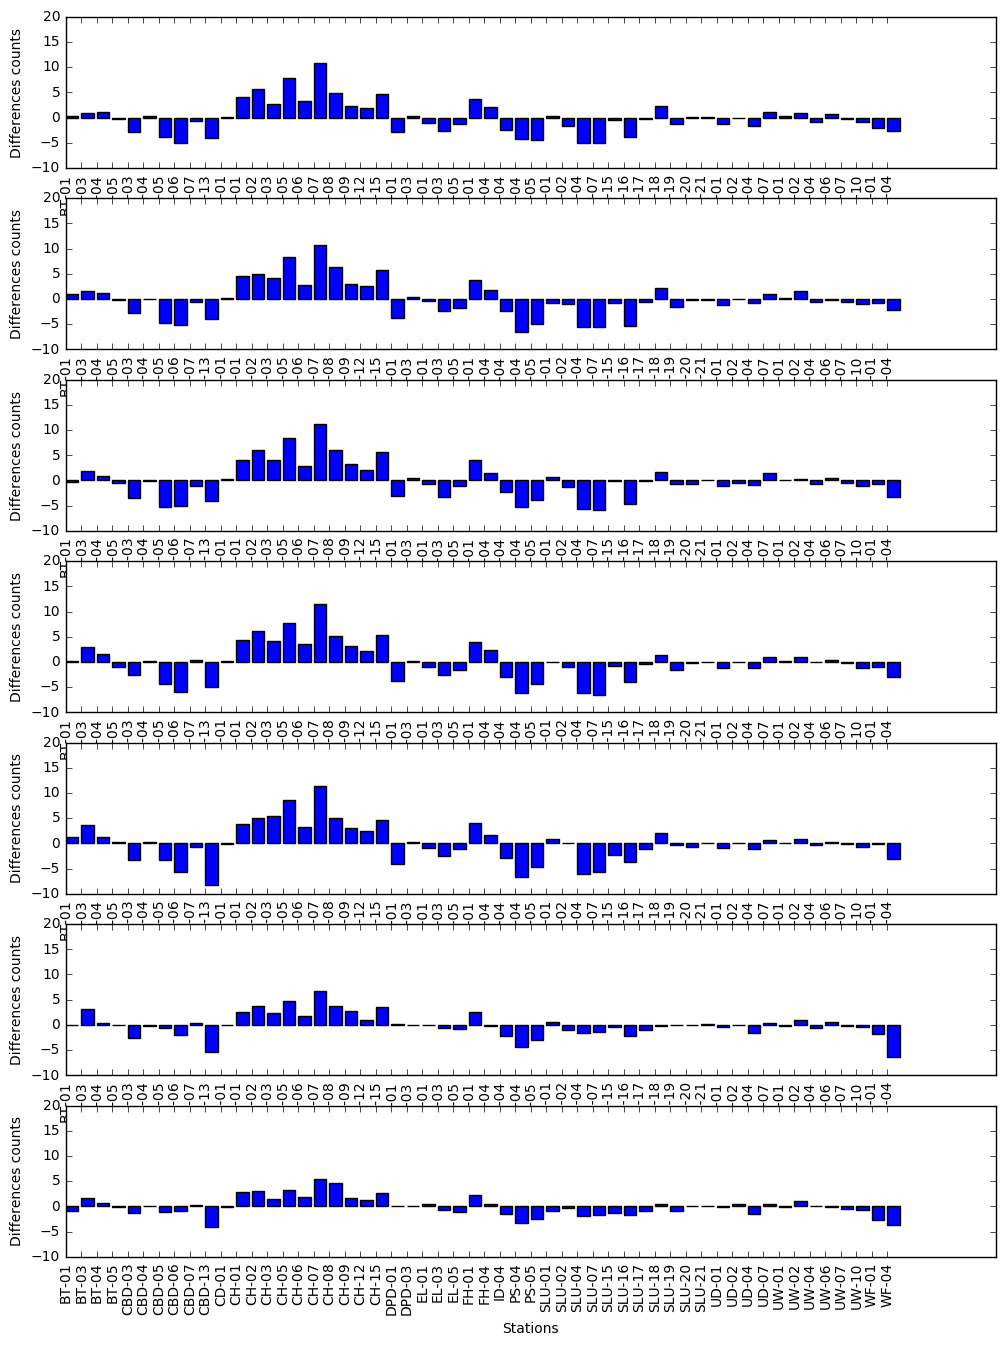

In [22]:
fig = plt.figure(figsize=(12, 16))  # Controls global properties of the bar plot
opts = {'xlabel': 'Stations', 'ylabel': 'Differences counts', 'ylim': [-10, 20]}
plot_barN(diff_counts_avg, opts)